In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [17]:
import sys, os
from math import ceil
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.spatial.transform import Rotation as R
from scipy import stats
import mdtraj as md
import tables as tb
import nglview as nv
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.matlab.hist as hist

up_ver = "upside2-md"
upside_utils_dir = os.path.expanduser("~/{}/py".format(up_ver))
sys.path.append(upside_utils_dir)
import mdtraj_upside as mu

In [3]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
base_dir = "/home/okleinmann/scratch-midway2/"
up_indir = base_dir + "up_input/"
pdb_id = "1hk9_model"
n_rep = 20

output_dir = base_dir + "runs/constT/1hk9_model/"

init_fn = up_indir + "{}.initial.npy".format(pdb_id)
fasta_fn = up_indir + "{}.fasta".format(pdb_id)
chain_breaks_fn = up_indir + "{}.chain_breaks".format(pdb_id)

traj = mu.load_upside_traj(init_fn, from_init=True, fasta_fn=fasta_fn, chain_breaks_fn=chain_breaks_fn)

acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")

In [5]:
print(traj)

<mdtraj.Trajectory with 1 frames, 3600 atoms, 612 residues, without unitcells>


In [6]:
view = nv.NGLWidget()
view.add_trajectory(traj)
view.clear_representations()
view.add_cartoon(color='gray')
view.add_spacefill(selection=acid_sele, color='red')
view.add_spacefill(selection=base_sele, color='blue')

view.camera = 'orthographic'
view.parameters = {
    "clipNear": -100, "clipFar": 1000,
    "fogNear": 0, "fogFar": 1000,
}
view

NGLWidget()

In [7]:
dssp = md.compute_dssp(traj[0])[0]
for i, ss in enumerate(dssp):
    print (i, ss)

0 C
1 C
2 C
3 C
4 H
5 H
6 H
7 H
8 H
9 H
10 H
11 H
12 H
13 H
14 H
15 H
16 H
17 C
18 C
19 C
20 E
21 E
22 E
23 E
24 E
25 E
26 C
27 C
28 C
29 C
30 E
31 E
32 E
33 E
34 E
35 E
36 E
37 E
38 E
39 C
40 C
41 C
42 E
43 E
44 E
45 E
46 E
47 C
48 C
49 C
50 E
51 E
52 E
53 E
54 E
55 H
56 H
57 H
58 E
59 E
60 E
61 E
62 E
63 E
64 C
65 C
66 C
67 C
68 C
69 C
70 C
71 C
72 C
73 C
74 C
75 C
76 C
77 C
78 C
79 C
80 C
81 C
82 C
83 C
84 C
85 C
86 C
87 C
88 C
89 C
90 C
91 C
92 C
93 C
94 C
95 C
96 C
97 C
98 C
99 C
100 C
101 C
102 C
103 C
104 C
105 C
106 H
107 H
108 H
109 H
110 H
111 H
112 H
113 H
114 H
115 H
116 H
117 H
118 H
119 C
120 C
121 C
122 E
123 E
124 E
125 E
126 E
127 E
128 C
129 C
130 C
131 C
132 E
133 E
134 E
135 E
136 E
137 E
138 E
139 E
140 E
141 C
142 C
143 C
144 E
145 E
146 E
147 E
148 E
149 C
150 C
151 C
152 E
153 E
154 E
155 E
156 E
157 H
158 H
159 H
160 E
161 E
162 E
163 E
164 E
165 E
166 C
167 C
168 C
169 C
170 C
171 C
172 C
173 C
174 C
175 C
176 C
177 C
178 C
179 C
180 C
181 C
182 C
183 C
184 C


In [8]:
restr_list = []
for i in range(traj.n_chains):
    restr_list.append([i*102, i*102+66])

In [9]:
restr_str = []
a_sele = []
for grp in restr_list:
    restr_str.append("{}-{}".format(grp[0], grp[1]))
    
    # for visualization check
    a_sele.append(traj.top.select("resid {} to {}".format(grp[0], grp[1])))
a_sele = np.concatenate(a_sele)
print (restr_str)

['0-66', '102-168', '204-270', '306-372', '408-474', '510-576']


In [10]:
# Visualization check
view = nv.NGLWidget()
view.add_trajectory(traj[0])
view.clear_representations()
view.add_backbone(selection=a_sele, color="magenta")
view.camera = 'orthographic'
view

NGLWidget()

In [11]:
traj_fn = output_dir + "{}.{}.up".format(pdb_id, 0)
traj = mu.load_upside_traj(traj_fn, stride=1)

restr_list = []
for i in range(traj.n_chains):
    restr_list.append([i*102, i*102+66])

a_sele = []
for grp in restr_list:
    a_sele.append(traj.top.select("resid {} to {}".format(grp[0], grp[1])))
a_sele = np.concatenate(a_sele)
traj.superpose(traj[0], atom_indices=a_sele)

acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")
arm_sele = []
for i in range(6):
    arm_sele.extend(traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66)))


#acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")

view = nv.NGLWidget()
view.add_trajectory(traj[:])
view.clear_representations()
view.add_cartoon(color='gray')
view.add_spacefill(selection=acid_sele, color='red')
view.add_spacefill(selection=base_sele, color='blue')

view.camera = 'orthographic'
view.parameters = {
    "clipNear": -100, "clipFar": 1000,
    "fogNear": 0, "fogFar": 1000,
}
view

NGLWidget(max_frame=999)

In [12]:
print(arm_sele)

[576, 588, 594, 606, 1187, 1199, 1205, 1217, 1798, 1810, 1816, 1828, 2409, 2421, 2427, 2439, 3020, 3032, 3038, 3050, 3631, 3643, 3649, 3661]


In [13]:
xyz = traj.xyz

In [14]:
acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")
print(acid_sele)
#print(base_sele)

[  48  102  216  234  576  588  594  606  659  713  827  845 1187 1199
 1205 1217 1270 1324 1438 1456 1798 1810 1816 1828 1881 1935 2049 2067
 2409 2421 2427 2439 2492 2546 2660 2678 3020 3032 3038 3050 3103 3157
 3271 3289 3631 3643 3649 3661]


In [15]:
traj.top.to_fasta()[0]

'MAKGQSLQDPFLNALRRERVPVSIYLVNGIKLQGQIESFDQFVILLKNTVSQMVYKHAISTVVPSRPVSHHSNNAGGGTSSNYHHGSSAQNTSAQQDSEETE'

In [16]:
xyz[:, acid_sele, :]

array([[[ 2.34279320e-01,  1.99117982e+00, -6.05698943e-01],
        [ 8.11679304e-01,  3.03407979e+00,  1.30601078e-01],
        [ 1.36547935e+00,  2.16227984e+00,  1.14601083e-01],
        ...,
        [ 7.04927921e+00,  6.83258009e+00, -4.21598911e-01],
        [ 7.41527939e+00,  6.73767996e+00, -3.94898951e-01],
        [ 7.97357941e+00,  6.45028019e+00, -3.08989212e-02]],

       [[ 6.99443370e-02,  1.99494457e+00, -8.21427763e-01],
        [ 8.73715937e-01,  2.90185285e+00, -1.15207754e-01],
        [ 1.30642843e+00,  2.10502863e+00, -2.33685598e-02],
        ...,
        [ 6.70206451e+00,  5.22644520e+00, -1.15252328e+00],
        [ 7.01400089e+00,  5.33544683e+00, -9.67562139e-01],
        [ 7.16834736e+00,  5.56534100e+00, -3.08905661e-01]],

       [[-1.57223523e-01,  2.10989237e+00, -7.76122034e-01],
        [ 7.54163384e-01,  2.92311478e+00, -4.18926403e-02],
        [ 1.31550157e+00,  2.14108562e+00,  1.49717852e-01],
        ...,
        [ 6.02959633e+00,  5.42206907e+00,

# E2E Distances

In [19]:
disc_center = traj.xyz[0, a_sele, :].mean(axis=0)

e2e_dists = []
for i in range(traj.n_chains):
    ch_a = traj.top.chain(i).n_atoms
    arm_end = traj.xyz[:, i*ch_a+ch_a-1, :]
    e2e_dists.append(10.*np.linalg.norm(arm_end-disc_center, axis=1))

#print(disc_center)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


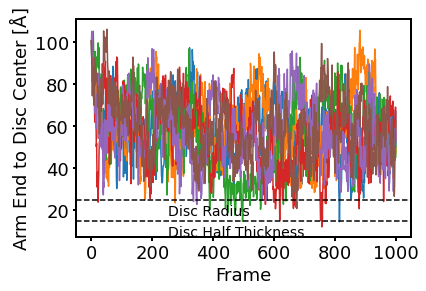

In [20]:
plt.figure(facecolor='w')
for i in range(traj.n_chains):    
    plt.plot(range(traj.n_frames), e2e_dists[i])
    
plt.xlabel('Frame')
plt.ylabel('Arm End to Disc Center [$\mathrm{\AA}$]')

plt.axhline(y=25, color='k', ls='--')
plt.axhline(y=15, color='k', ls='--')

plt.annotate("Disc Radius", xy=(250, 25), xytext=(0,-15),
             textcoords='offset pixels', fontsize=14)
plt.annotate("Disc Half Thickness", xy=(250, 15), xytext=(0,-15),
             textcoords='offset pixels', fontsize=14)

plt.show()

# Charge Density Projected on Z Axis

In [16]:
import math

In [37]:
#use: p0, p1, p2 = [traj.xyz[0][2+i*102] for i in range(3)]

def z_finder(p0,p1,p2):

#finding the z vector

    origin=(0,0,0)

    x0, y0, z0 = p0
    x1, y1, z1 = p1
    x2, y2, z2 = p2

    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

    u_cross_v = [uy*vz-uz*vy*-1, uz*vx-ux*vz*-1, ux*vy-uy*vx*-1]

    return u_cross_v/np.linalg.norm(u_cross_v,ord=2)
    
    point  = np.array(p0)
    normal = np.array(u_cross_v)

    d = -point.dot(normal)

    xx, yy = np.meshgrid(range(10), range(10))

    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    

    # plot the surface
    # plt3d = plt.figure().gca(projection='3d')
    # plt3d.plot_surface(xx, yy, z)
    # print("z axis: "+ str(old_v))

[0, 0, 0, 0, 0]

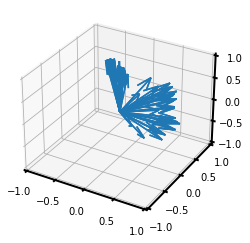

In [54]:
rep=1
test_frame=10

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

z_avg=[]

for j in range(66):
        z_avg.append(z_finder(*[traj.xyz[test_frame][j+k*102] for k in range(0,6,2)]))
        z_avg.append(z_finder(*[traj.xyz[test_frame][j+k*102] for k in range(0,6,2)]))



X=[0]*len(z_avg)

U=[]
V=[]
W=[]

for vector in z_avg:
    vector_n=vector/np.linalg.norm(vector,ord=2)
    U.append(vector_n[0])
    V.append(vector_n[1])
    W.append(vector_n[2])
            

#X, Y, Z, U, V, W = zip(*soa)
#print(X)
#print(Y)
#print(Z)
#print(U)
#print(V)
#print(W)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, X, X, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

/tmp/ipykernel_2343/1011285506.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection='3d')


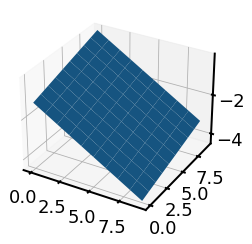

NameError: name 'old_v' is not defined

In [62]:
p0,p1,p2=[traj.xyz[1][30+k*102] for k in range(0,6,2)]
#finding the z vector

origin=(0,0,0)

x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy*-1, uz*vx-ux*vz*-1, ux*vy-uy*vx*-1]

# return u_cross_v/np.linalg.norm(u_cross_v,ord=2)
    
point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    

    # plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()
#print("z axis: "+ str(old_v))

In [55]:
z_finder_checker(*[traj.xyz[1][30+k*102] for k in range(0,6,2)])

array([ 0.33431724, -0.12210639,  0.93451699])

In [ ]:
def bin_std_plotter (bw,br,vals)
    

In [ ]:
numpy.hit

In [35]:
z_avg=[[1,5],[3,5]]
z_avg=np.mean(z_avg,axis=0)
z_avg

array([2., 5.])

In [36]:
range(1)

range(0, 1)

In [38]:
#spits out n duplicates of each value n given
def histo_expander(histogram_list):
    final_y_list=[]
    for i in histogram_list:
        for j in range(i):
            final_y_list.append(i)
    return final_y_list

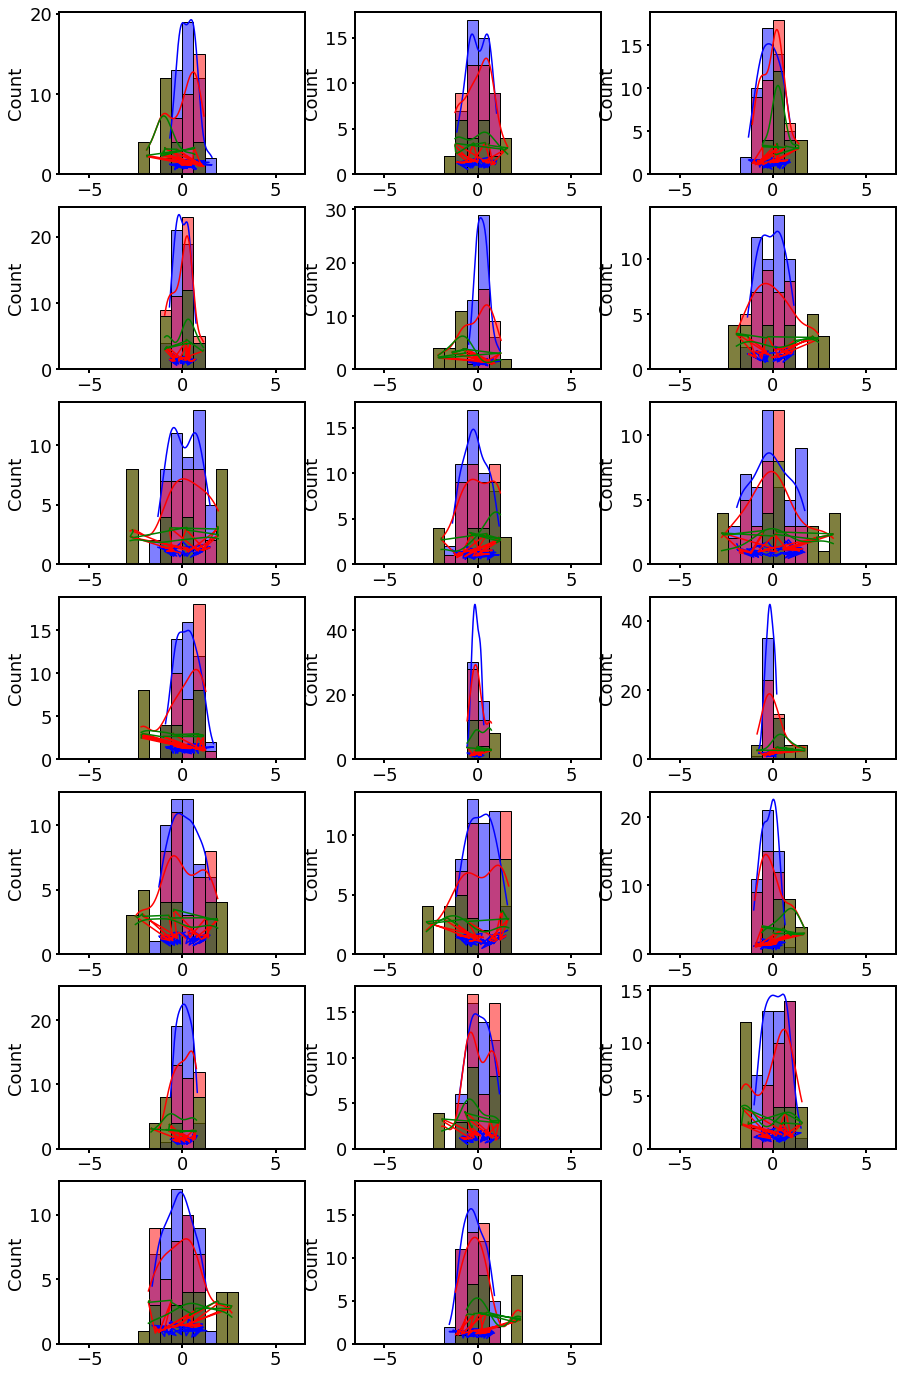

In [51]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    
    plot_binwidth=0.6
    plot_binrange=[-6,6]
    #plot_bins=np.arange(plot_binrange[0],plot_binrange[1],plot_binwidth)
    #std_y_base=histo_expander(np.histogram(avg_pos_base_z,bins=plot_bins)[-1])


    positive_charge_z_vals=[]
    negative_charge_z_vals=[]
    arm_charge_z_vals=[]
    for i in range(traj.n_frames):
        #print([np.dot(z,j) for j in traj.xyz[i,acid_sele,:]])
        z_avg=[]
        for j in range(66):
            z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
            z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
        z_avg=np.mean(z_avg,axis=0)
        z_avg_2=z_avg/np.linalg.norm(z_avg,ord=2)
        positive_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,base_sele,:]])
        negative_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,acid_sele,:]])
        arm_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,arm_sele,:]]) #find z vals of arm along z axis
    avg_pos_base_z=np.array(np.mean(positive_charge_z_vals[200:],axis=0))
    std_pos_base_z=np.array(np.std(positive_charge_z_vals[200:],axis=0))
    avg_pos_acid_z=np.array(np.mean(negative_charge_z_vals[200:],axis=0))
    std_pos_acid_z=np.array(np.std(negative_charge_z_vals[200:],axis=0))
    avg_pos_arm_z=np.array(np.mean(arm_charge_z_vals[200:],axis=0)) 
    std_pos_arm_z=np.array(np.std(arm_charge_z_vals[200:],axis=0))
    ax = sb.histplot(avg_pos_base_z,color="b",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
    ax = plt.plot(avg_pos_base_z,std_pos_base_z,color="b")
    #ax = sb.errorbar()
    ax = sb.histplot(avg_pos_acid_z,color="r",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
    ax = plt.plot(avg_pos_acid_z,std_pos_acid_z,color="r")
    ax = sb.histplot(avg_pos_arm_z,color="g",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
    ax = plt.plot(avg_pos_arm_z,std_pos_arm_z,color="g")
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    #ax.legend(labels=["base","acid"],loc="upper left")
    #ax.set_xlabel("z position (nm)")
    
    

In [ ]:


plot_binwidth=0.6
plot_binrange=[-6,6]
#plot_bins=np.arange(plot_binrange[0],plot_binrange[1],plot_binwidth)
#std_y_base=histo_expander(np.histogram(avg_pos_base_z,bins=plot_bins)[-1])


positive_charge_z_vals=[]
negative_charge_z_vals=[]
arm_charge_z_vals=[]
for i in range(traj.n_frames):
    #print([np.dot(z,j) for j in traj.xyz[i,acid_sele,:]])
    z_avg=[]
    for j in range(66):
        z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
        z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
    z_avg=np.mean(z_avg,axis=0)
    z_avg_2=z_avg/np.linalg.norm(z_avg,ord=2)
    positive_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,base_sele,:]])
    negative_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,acid_sele,:]])
    arm_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,arm_sele,:]]) #find z vals of arm along z axis
avg_pos_base_z=np.array(np.mean(positive_charge_z_vals[200:],axis=0))
std_pos_base_z=np.array(np.std(positive_charge_z_vals[200:],axis=0))
avg_pos_acid_z=np.array(np.mean(negative_charge_z_vals[200:],axis=0))
std_pos_acid_z=np.array(np.std(negative_charge_z_vals[200:],axis=0))
avg_pos_arm_z=np.array(np.mean(arm_charge_z_vals[200:],axis=0)) 
std_pos_arm_z=np.array(np.std(arm_charge_z_vals[200:],axis=0))
ax = sb.histplot(avg_pos_base_z,color="b",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_base_z,std_pos_base_z,color="b")
#ax = sb.errorbar()
ax = sb.histplot(avg_pos_acid_z,color="r",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_acid_z,std_pos_acid_z,color="r")
ax = sb.histplot(avg_pos_arm_z,color="g",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_arm_z,std_pos_arm_z,color="g")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.legend(labels=["base","acid"],loc="upper left")
ax.set_xlabel("z position (nm)")

AttributeError: 'list' object has no attribute 'legend'

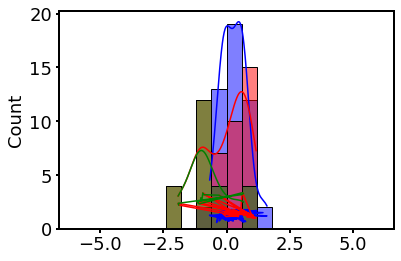

In [49]:


plot_binwidth=0.6
plot_binrange=[-6,6]
#plot_bins=np.arange(plot_binrange[0],plot_binrange[1],plot_binwidth)
#std_y_base=histo_expander(np.histogram(avg_pos_base_z,bins=plot_bins)[-1])


positive_charge_z_vals=[]
negative_charge_z_vals=[]
arm_charge_z_vals=[]
for i in range(traj.n_frames):
    #print([np.dot(z,j) for j in traj.xyz[i,acid_sele,:]])
    z_avg=[]
    for j in range(66):
        z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
        z_avg.append(z_finder(*[traj.xyz[i][j+k*102] for k in range(0,6,2)]))
    z_avg=np.mean(z_avg,axis=0)
    z_avg_2=z_avg/np.linalg.norm(z_avg,ord=2)
    positive_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,base_sele,:]])
    negative_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,acid_sele,:]])
    arm_charge_z_vals.append([np.dot(z_avg_2,j) for j in traj.xyz[i,arm_sele,:]]) #find z vals of arm along z axis
avg_pos_base_z=np.array(np.mean(positive_charge_z_vals[200:],axis=0))
std_pos_base_z=np.array(np.std(positive_charge_z_vals[200:],axis=0))
avg_pos_acid_z=np.array(np.mean(negative_charge_z_vals[200:],axis=0))
std_pos_acid_z=np.array(np.std(negative_charge_z_vals[200:],axis=0))
avg_pos_arm_z=np.array(np.mean(arm_charge_z_vals[200:],axis=0)) 
std_pos_arm_z=np.array(np.std(arm_charge_z_vals[200:],axis=0))
ax = sb.histplot(avg_pos_base_z,color="b",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_base_z,std_pos_base_z,color="b")
#ax = sb.errorbar()
ax = sb.histplot(avg_pos_acid_z,color="r",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_acid_z,std_pos_acid_z,color="r")
ax = sb.histplot(avg_pos_arm_z,color="g",kde=True,binrange=plot_binrange,binwidth=plot_binwidth)
ax = plt.plot(avg_pos_arm_z,std_pos_arm_z,color="g")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.legend(labels=["base","acid","arm"],loc="upper left")
ax.set_xlabel("z position (nm)")


plt.title("Replica {}".format(1))

In [19]:
np.size(std_pos_base_z)

48

In [20]:
np.size(avg_pos_base_z)

48

In [ ]:
np.size()

In [68]:
arm_sele

array([3631, 3643, 3649, 3661])

In [74]:
k=8.988*1.6022*10**8
# will be matrix with frames as columns and and distances along z as rows
number_of_pos_charges=len(positive_charge_z_vals[0])
number_of_neg_charges=len(negative_charge_z_vals[0])
pos_field=[] 
neg_field=[]
#interating through all frames
for i in range(200,traj.n_frames):
    pos_field.append([]) #creating rows
    neg_field.append([])
    #now pick a distance
    for j in range(-100,101):
        #find force at distance at frame and add to list
        #now we just have to interate through all charges
        force_per_frame_per_d=0
        for m in range(number_of_pos_charges):
            force_per_frame_per_d+=k/(positive_charge_z_vals[i][m]-j)**2
        pos_field[-1].append(force_per_frame_per_d)
        
        force_per_frame_per_d=0
        for n in range(number_of_neg_charges):
            force_per_frame_per_d+=k/(positive_charge_z_vals[i][m]-j)**2
        neg_field[-1].append(force_per_frame_per_d)

201

In [81]:
print(neg_field[1])

[4793987.802739308, 4874844.603494775, 4957764.421329948, 5042818.040156542, 5130079.305954903, 5219625.287116156, 5311536.44466597, 5405896.813072251, 5502794.192395418, 5602320.352602003, 5704571.250929372, 5809647.263263211, 5917653.430569751, 6028699.721512678, 6142901.312481034, 6260378.886360031, 6381258.951492055, 6505674.182402772, 6633763.784005973, 6765673.881154876, 6901557.935575796, 7041577.192406406, 7185901.158765422, 7334708.11700697, 7488185.6755625, 7646531.360549212, 7809953.251630325, 7978670.665950268, 8152914.8943446865, 8332929.994441419, 8518973.64573313, 8711318.072218012, 8910251.038780103, 9116076.928122362, 9329117.905782182, 9549715.181559661, 9778230.376586651, 10015047.006269425, 10260572.090467518, 10515237.903539272, 10779503.878313718, 11053858.679658113, 11338822.46512825, 11634949.352243567, 11942830.114255695, 12263095.128918238, 12596417.607762493, 12943517.136794211, 13305163.563413225, 13682181.268794652, 14075453.870045714, 14485929.4022659, 149

In [87]:
net_field=np.mean(np.array(pos_field)-np.array(neg_field), axis=0)


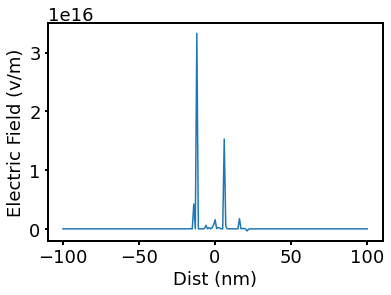

In [90]:
plt.figure(facecolor='w')    
plt.plot(range(-100,101), net_field)
    
plt.xlabel('Dist (nm)')
plt.ylabel('Electric Field (v/m)')
plt.show()

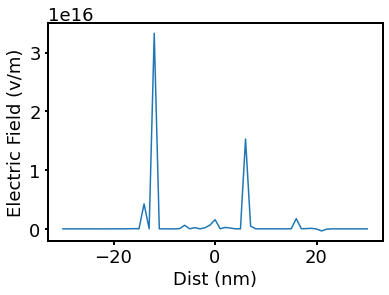

In [97]:
plt.figure(facecolor='w')    
plt.plot(range(-30,31), net_field[70:-70])
    
plt.xlabel('Dist (nm)')
plt.ylabel('Electric Field (v/m)')
plt.show()

Text(0.5, 0.0, 'Dist (nm)')

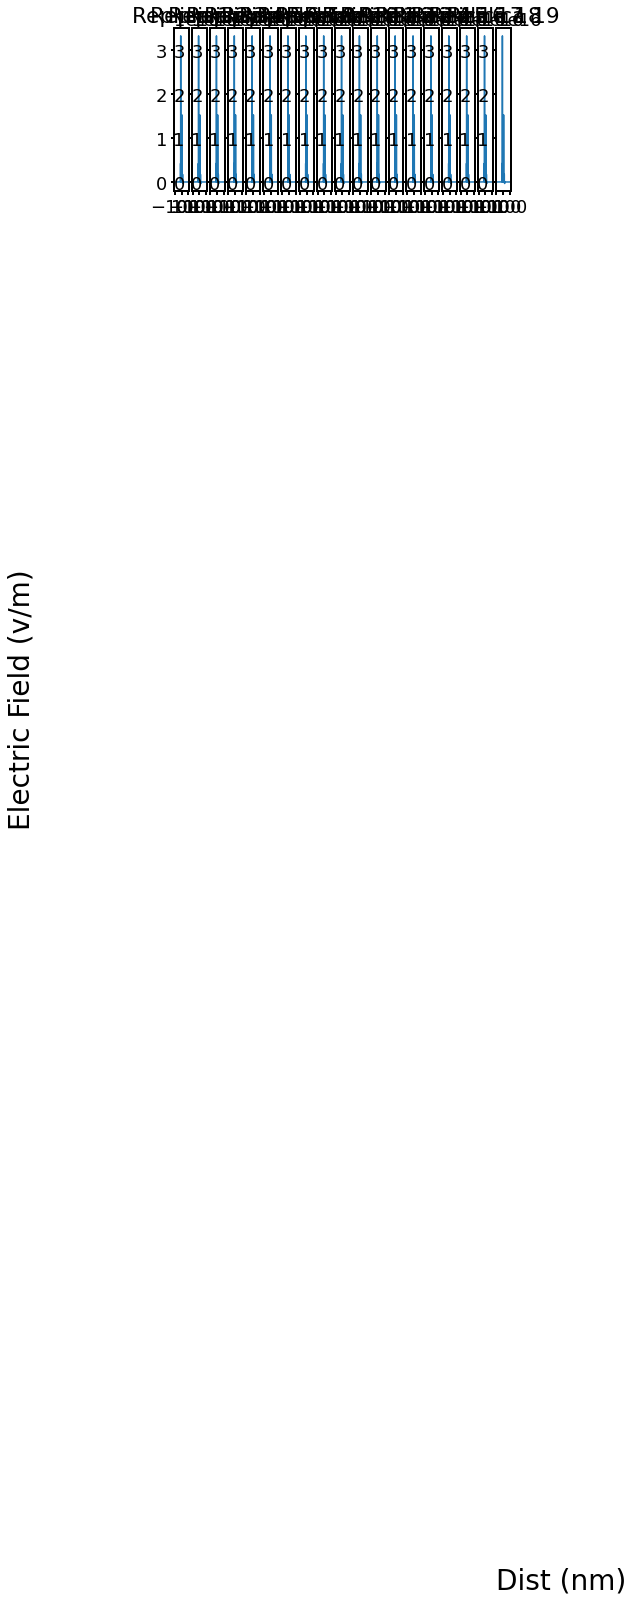

In [100]:
cutoff = 10.
k=8.988*1.6022*10**8

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    positive_charge_z_vals=[]
    negative_charge_z_vals=[]
    for i in range(traj.n_frames):
        #print([np.dot(z,j) for j in traj.xyz[i,acid_sele,:]])
        positive_charge_z_vals.append([np.dot(u_cross_v,j) for j in traj.xyz[i,base_sele,:]])
        negative_charge_z_vals.append([np.dot(u_cross_v,j) for j in traj.xyz[i,acid_sele,:]])

    # will be matrix with frames as columns and and distances along z as rows
    number_of_pos_charges=len(positive_charge_z_vals[0])
    number_of_neg_charges=len(negative_charge_z_vals[0])
    pos_field=[] 
    neg_field=[]
    #interating through all frames
    for i in range(200,traj.n_frames):
        pos_field.append([]) #creating rows
        neg_field.append([])
        #now pick a distance
        for j in range(-100,101):
            #find force at distance at frame and add to list
            #now we just have to interate through all charges
            force_per_frame_per_d=0
            for m in range(number_of_pos_charges):
                force_per_frame_per_d+=k/(positive_charge_z_vals[i][m]-j)**2
            pos_field[-1].append(force_per_frame_per_d)

            force_per_frame_per_d=0
            for n in range(number_of_neg_charges):
                force_per_frame_per_d+=k/(positive_charge_z_vals[i][m]-j)**2
            neg_field[-1].append(force_per_frame_per_d)

    #plt.figure(facecolor='w')    
    plt.plot(range(-100,101), net_field)
    plt.title("Replica {}".format(rep))

fig0.text(0., 0.5, 'Electric Field (v/m)', fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'Dist (nm)', fontsize=28, ha='center', va='center')
#plt.tight_layout()

In [21]:
print(positive_charge_z_vals)

[[1.8178772512031927, 16.31223142546749, 17.610205356475152, 19.628041932418853, 13.882497052820632, 18.565364872509, 7.459301059511493, 18.20988903739619, -9.252909521931379, 3.254362519608217, 2.5134805238627145, 4.885221123109602, 6.730597764653325, 9.90779622076499, 2.5856990927612764, 0.46809279489302114, -14.200707714536296, -12.990739840529914, -15.586598390766898, -13.415613685052538, -2.313689670583507, -6.391120494522589, -4.418850736349048, -14.474315011620075, -8.066785904255664, -16.086017764557162, -18.48536558174853, -16.97163698262645, -4.435677186396951, -13.89913004685004, -6.444498778650224, -12.056492329547591, 2.887003158560411, -3.375520442416249, -3.8122304718374735, -2.6370160620839176, 2.645692745210326, -5.497484741242097, -1.5941830978547307, 5.304380443508808, 8.082112791464045, 12.979293277865558, 14.434396989952251, 15.838475985347964, 11.844261281697406, 10.741937969451161, 5.374450018995613, 20.739099850142402], [0.5618954449751143, 14.8752307255326, 16.

In [25]:
for i in range(-10,11):
    print(i)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


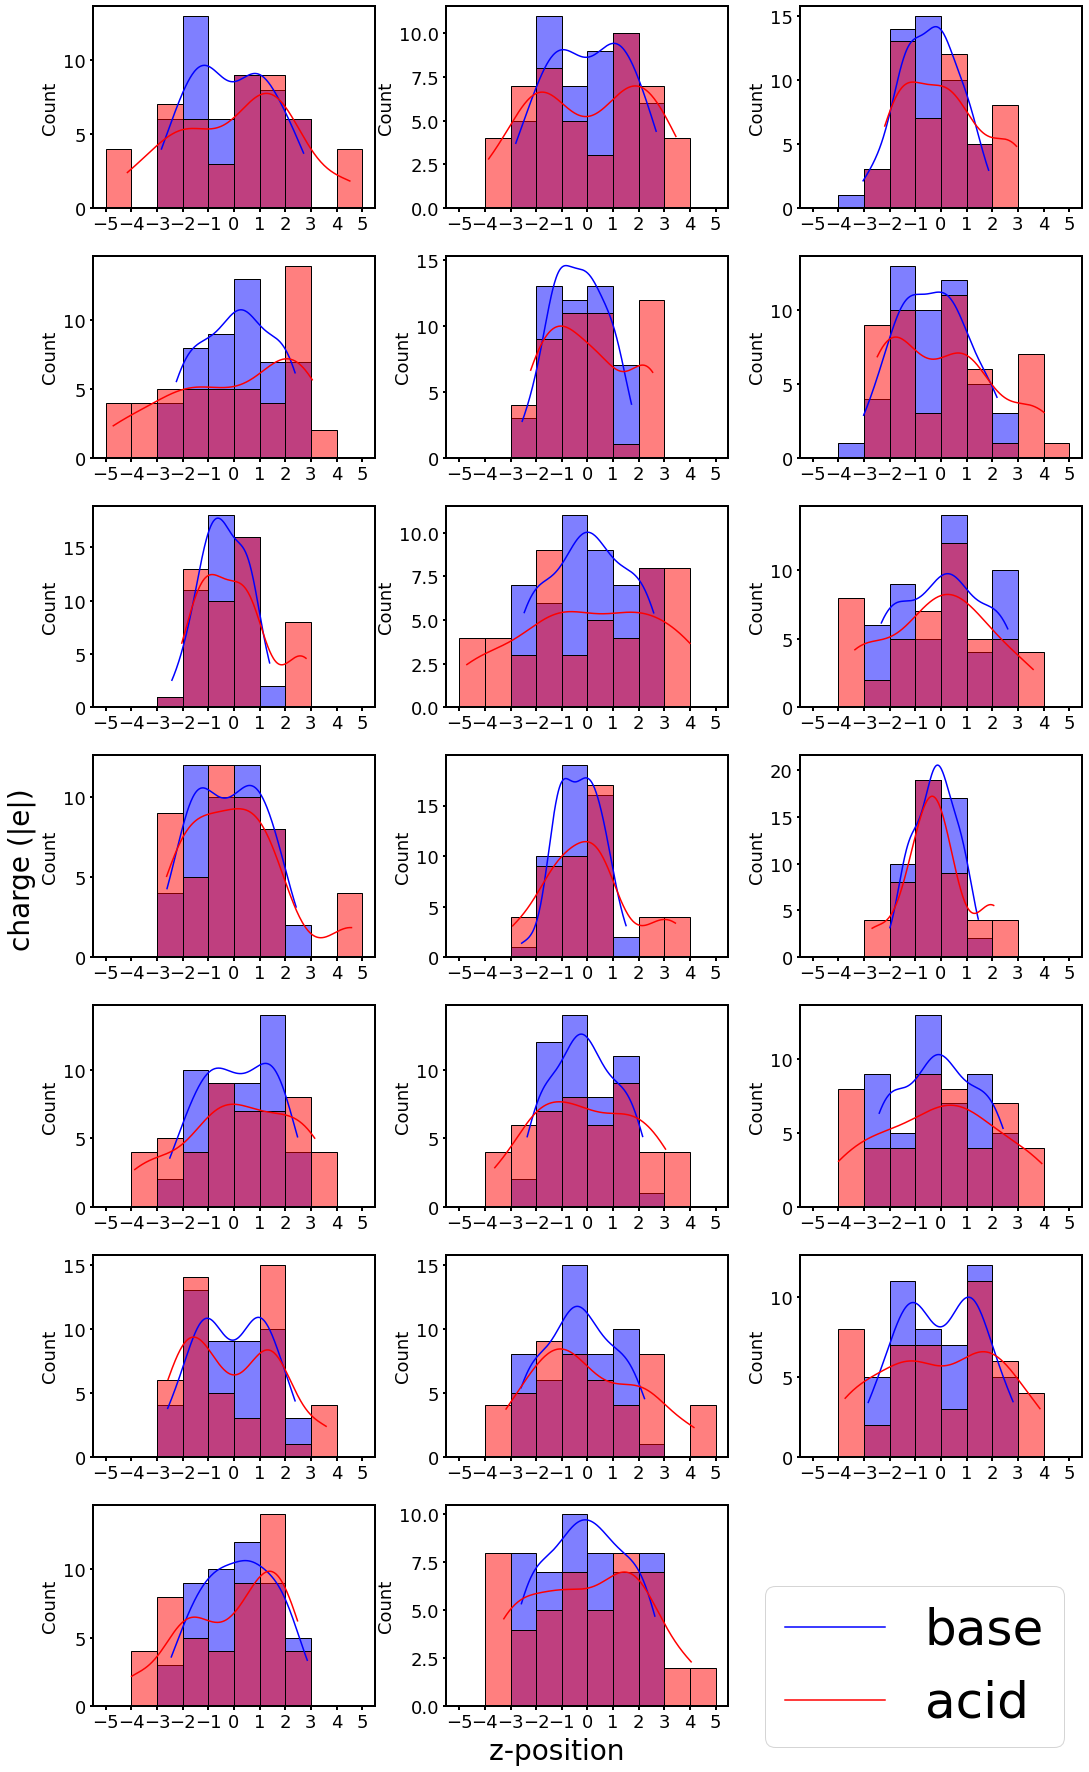

In [55]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    #finding the z vector

    origin=(0,0,0)
    p0,p1, p2 = [traj.xyz[0][2+i*102] for i in range(3)]
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    x2, y2, z2 = p2

    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

    u_cross_v = [uy*vz-uz*vy*-1, uz*vx-ux*vz*-1, ux*vy-uy*vx*-1]

    point  = np.array(p0)
    normal = np.array(u_cross_v)

    d = -point.dot(normal)

    xx, yy = np.meshgrid(range(10), range(10))

    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    
    u_cross_v_mag = np.linalg.norm(u_cross_v,ord=2)

    # plot the surface
    # plt3d = plt.figure().gca(projection='3d')
    # plt3d.plot_surface(xx, yy, z)
    # print("z axis: "+ str(old_v))
    
    positive_charge_z_vals=[]
    negative_charge_z_vals=[]
    for i in range(1000):
        #print([np.dot(z,j) for j in traj.xyz[i,acid_sele,:]])
        positive_charge_z_vals.append([np.dot(u_cross_v,j) for j in traj.xyz[i,base_sele,:]])
        negative_charge_z_vals.append([np.dot(u_cross_v,j) for j in traj.xyz[i,acid_sele,:]])
    avg_pos_base_z=np.array(np.mean(positive_charge_z_vals[200:],axis=0))/u_cross_v_mag
    avg_pos_acid_z=np.array(np.mean(negative_charge_z_vals[200:],axis=0))/u_cross_v_mag
    ax = sb.histplot(avg_pos_base_z,color="b",kde=True,binrange=(-5,5),binwidth=1,y=None)
    ax = sb.histplot(avg_pos_acid_z,color="r",kde=True,binrange=(-5,5),binwidth=1,y=None)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    

fig0.legend(labels=["base","acid"],loc="lower right",prop={"size":50})
fig0.text(0., 0.5, 'charge (|e|)', fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'z-position ', fontsize=28, ha='center', va='center')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

# ARM-Disc Charge Contacts

In [74]:
cutoff = 10.

arms_in_contact = []

for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    pair_list = np.array([(i, j) for i in arm_charges for j in base_sele])
    
    dists = 10.*md.compute_distances(traj, pair_list, periodic=False, opt=True)
    is_contact = dists < cutoff
    arms_in_contact.append(is_contact.any(axis=1))
arms_in_contact = np.stack(arms_in_contact, axis=1).sum(axis=1)

In [75]:
dists.shape

(1000, 192)

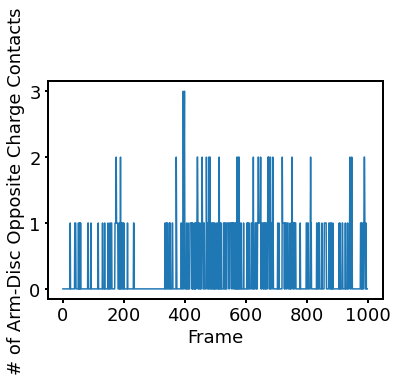

In [76]:
plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), arms_in_contact)
    
plt.xlabel('Frame')
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()

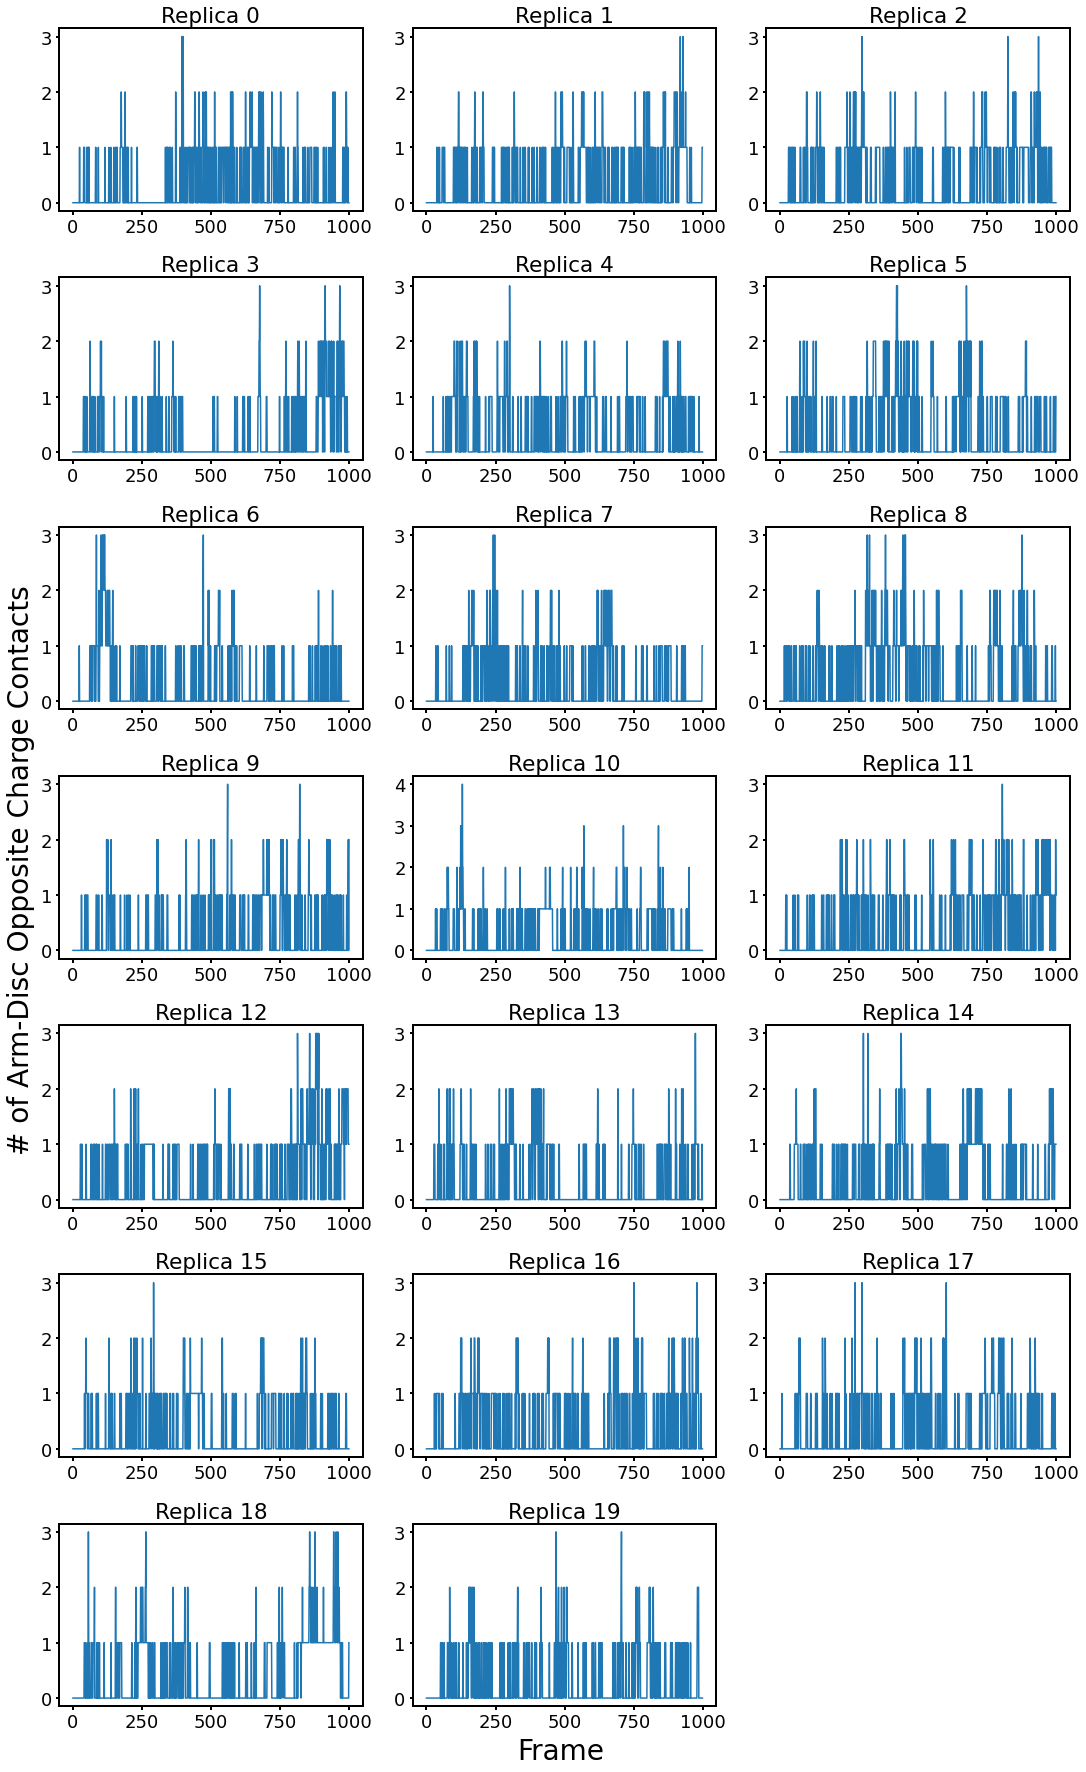

In [77]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    arms_in_contact = []
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        pair_list = np.array([(i, j) for i in arm_charges for j in base_sele])

        dists = 10.*md.compute_distances(traj, pair_list, periodic=False, opt=True)
        is_contact = dists < cutoff
        arms_in_contact.append(is_contact.any(axis=1))
    arms_in_contact = np.stack(arms_in_contact, axis=1).sum(axis=1)
    
    plt.plot(range(traj.n_frames), arms_in_contact)
    plt.title("Replica {}".format(rep))

fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts', fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

# Sampling Test w/ Arm Preference

Text(0, 0.5, 'Top vs Bottom Contacts')

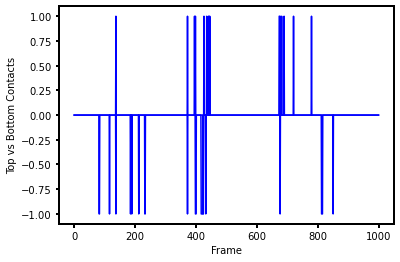

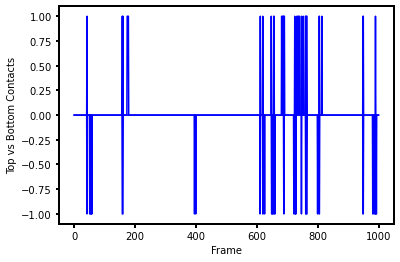

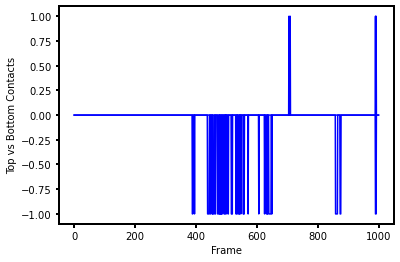

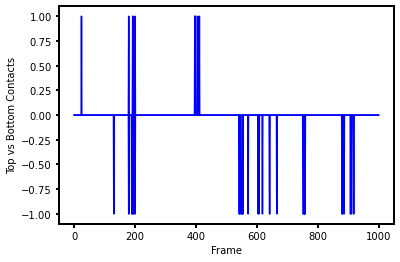

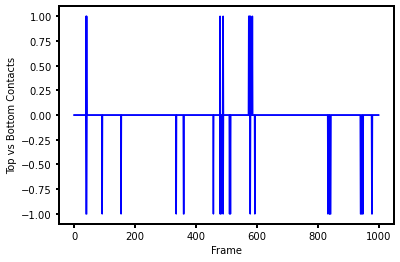

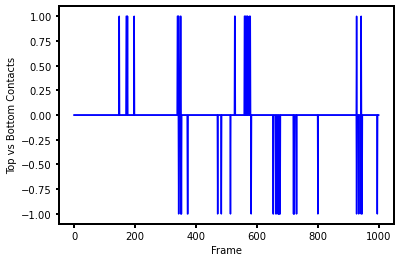

In [132]:
cutoff=10

top_contacts = []
bottom_contacts = []
top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    # print(top_charges)
    # print(bottom_charges)

for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))
    
    arm_1_top_contacts=top_contacts[0:][::6]
    arm_2_top_contacts=top_contacts[1:][::6]
    arm_3_top_contacts=top_contacts[2:][::6]
    arm_4_top_contacts=top_contacts[3:][::6]
    arm_5_top_contacts=top_contacts[4:][::6]
    arm_6_top_contacts=top_contacts[5:][::6]
    arm_1_bottom_contacts=bottom_contacts[0:][::6]
    arm_2_bottom_contacts=bottom_contacts[1:][::6]
    arm_3_bottom_contacts=bottom_contacts[2:][::6]
    arm_4_bottom_contacts=bottom_contacts[3:][::6]
    arm_5_bottom_contacts=bottom_contacts[4:][::6]
    arm_6_bottom_contacts=bottom_contacts[5:][::6]
    
plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_1_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_1_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_2_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_2_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_3_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_3_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_4_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_4_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_5_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_5_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), np.transpose(arm_6_top_contacts),color="b")
plt.plot(range(traj.n_frames),np.transpose(np.array(arm_6_bottom_contacts).astype(int)*-1),color="b")
plt.xlabel('Frame')
plt.ylabel('Top vs Bottom Contacts')

AttributeError: 'Figure' object has no attribute 'set_xlabel'

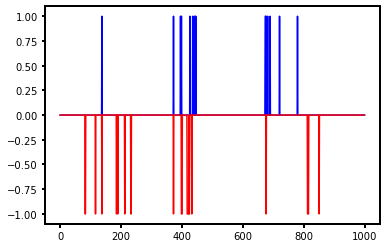

In [112]:
range(1000)

range(0, 1000)

# ARM-Disc Side Preferance

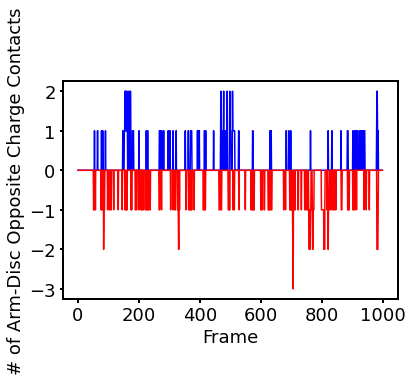

Total number of top contacts: 136
Total number of bottom contacts: 218


In [78]:
top_contacts = []
bottom_contacts = []
top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    # print(top_charges)
    # print(bottom_charges)

for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

# print(len(top_contacts))
# print(top_contacts)
top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
plt.figure(facecolor='w')    
plt.plot(range(traj.n_frames), top_contacts,color="b")
plt.plot(range(traj.n_frames), bottom_contacts*-1,color="r")

    
plt.xlabel('Frame')
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()

print("Total number of top contacts: {}".format(np.sum(top_contacts)))
print("Total number of bottom contacts: {}".format(np.sum(bottom_contacts)))

In [79]:
asdas=[3,2,1]
print(asdas.append(['x','y','z']))
print(str(asdas))

None
[3, 2, 1, ['x', 'y', 'z']]


In [80]:
top_contacts = []
bottom_contacts = []

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
for i in range(traj.n_chains):
    bottom_charges = traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)

No handles with labels found to put in legend.


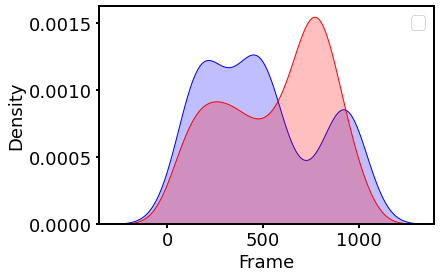

Total number of top contacts: 136
Total number of bottom contacts: 218


In [83]:
top_contacts = []
bottom_contacts = []

top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
for i in range(traj.n_chains):
    arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
    top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
    bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
    
    top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
    bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
    is_contact = top_dists < cutoff
    top_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_dists < cutoff
    bottom_contacts.append(is_contact.any(axis=1))

top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)

top_contacts_kde = []
for i in range(0,len(top_contacts)):
    if top_contacts[i] == 1:
        top_contacts_kde.append(i)
    if top_contacts[i] == 2:
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
    if top_contacts[i] == 3:
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
        top_contacts_kde.append(i)
    if bottom_contacts[i] == 4:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)      
        bottom_contacts_kde.append(i)    
        
bottom_contacts_kde = []
for i in range(0,len(bottom_contacts)):
    if bottom_contacts[i] == 1:
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 2:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 3:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
    if bottom_contacts[i] == 4:
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)
        bottom_contacts_kde.append(i)      
        bottom_contacts_kde.append(i)

plt.figure(facecolor='w')    
sb.kdeplot(top_contacts_kde,gridsize=1000,shade=True,color="b")
sb.kdeplot(bottom_contacts_kde,gridsize=1000,shade=True,color="r")

    
plt.xlabel('Frame')
plt.ylabel('Density')
plt.legend()
plt.show()

print("Total number of top contacts: {}".format(np.sum(top_contacts)))
print("Total number of bottom contacts: {}".format(np.sum(bottom_contacts)))

104 top contacts in replica 0
240 bottom contacts in replica 0
140 top contacts in replica 1
301 bottom contacts in replica 1
93 top contacts in replica 2
379 bottom contacts in replica 2
88 top contacts in replica 3
235 bottom contacts in replica 3
107 top contacts in replica 4
309 bottom contacts in replica 4
118 top contacts in replica 5
366 bottom contacts in replica 5
137 top contacts in replica 6
219 bottom contacts in replica 6
173 top contacts in replica 7
189 bottom contacts in replica 7
91 top contacts in replica 8
425 bottom contacts in replica 8
123 top contacts in replica 9
265 bottom contacts in replica 9
101 top contacts in replica 10
293 bottom contacts in replica 10
209 top contacts in replica 11
219 bottom contacts in replica 11
87 top contacts in replica 12
369 bottom contacts in replica 12
98 top contacts in replica 13
225 bottom contacts in replica 13
88 top contacts in replica 14
333 bottom contacts in replica 14
114 top contacts in replica 15
226 bottom contacts 

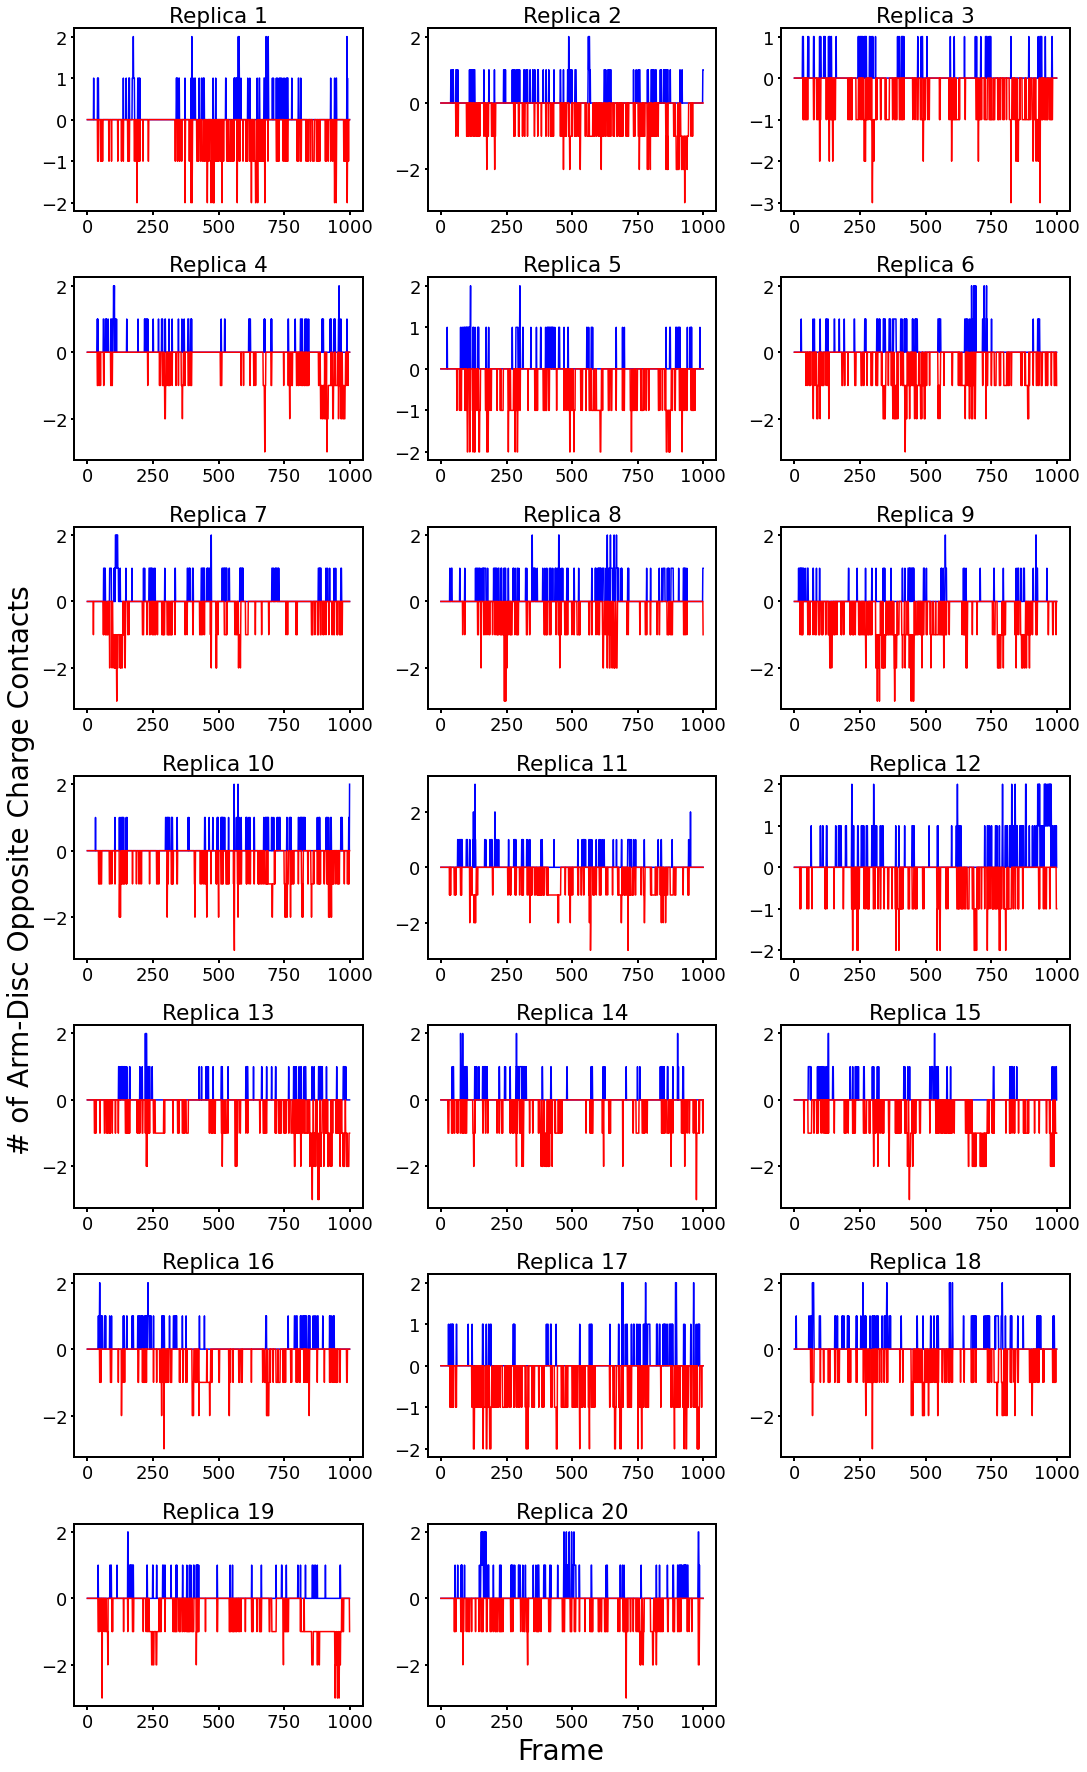

In [100]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

contact_count=[]
top_contact_count=0
bottom_contact_count=0
top_contact_table=np.zeros(5)
bottom_contact_table=np.zeros(5)



for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_contacts = []
    bottom_contacts = []
    
    
    top_charges =[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
        bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
        
        top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
        bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
        is_contact = top_dists < cutoff
        top_contacts.append(is_contact.any(axis=1))
        is_contact = bottom_dists < cutoff
        bottom_contacts.append(is_contact.any(axis=1))

    top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
    bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
    rep_top_contact_table=np.bincount(top_contacts)
    rep_bottom_contact_table=np.bincount(bottom_contacts)
    
    top_contact_table += np.pad(rep_top_contact_table,(0,5-rep_top_contact_table.size),'constant')
    bottom_contact_table += np.pad(rep_bottom_contact_table,(0,5-rep_bottom_contact_table.size),'constant')
  
    plt.plot(range(traj.n_frames), top_contacts,color="b")
    plt.plot(range(traj.n_frames), bottom_contacts*-1,color="r")
    plt.title("Replica {}".format(rep+1))
    
    print("{} top contacts in replica {}".format(np.sum(top_contacts),rep))
    print("{} bottom contacts in replica {}".format(np.sum(bottom_contacts),rep))
    
    contact_count.append(np.sum(top_contacts))
    contact_count.append(np.sum(-1*bottom_contacts))
    
    top_contact_count += np.sum(top_contacts)
    bottom_contact_count += np.sum(bottom_contacts)

# expected_val = top_contact_count + bottom_contact_count * 0.5
# chi_sqr = ((top_contact_count - expected_val)**2 + ((bottom_contact_count - expected_val)**2))/expected_val
    
# contact_count=np.array(contact_count)
# print("The mean number of contacts across each replica is {} and the standard deviation is {}.".format(np.mean(contact_count),np.std(contact_count)))
# print("The total number of top contacts is {} and the total number of botom contacts is {}. The chi-squared is {}.".format(top_contact_count,bottom_contact_count,chi_sqr))
# print("The p-value is {}".format(1-stats.chi2.cdf(chi_sqr,1)))

fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts'm, fontsize=28, ha='center', va='center', rotation='vertical')
fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

In [85]:
col_names=["No Contact","Single Contact","Double Contact","Triple Contact","Quadruple Contact"]
obs_data = {
    '': col_names,
    'Top Contact Count': top_contact_table,
    'Bottom Contact Count': bottom_contact_table,
}
pd.DataFrame(obs_data)

,,Top Contact Count,Bottom Contact Count
0,No Contact,17783.0,14855.0
1,Single Contact,2099.0,4534.0
2,Double Contact,117.0,579.0
3,Triple Contact,1.0,32.0
4,Quadruple Contact,0.0,0.0


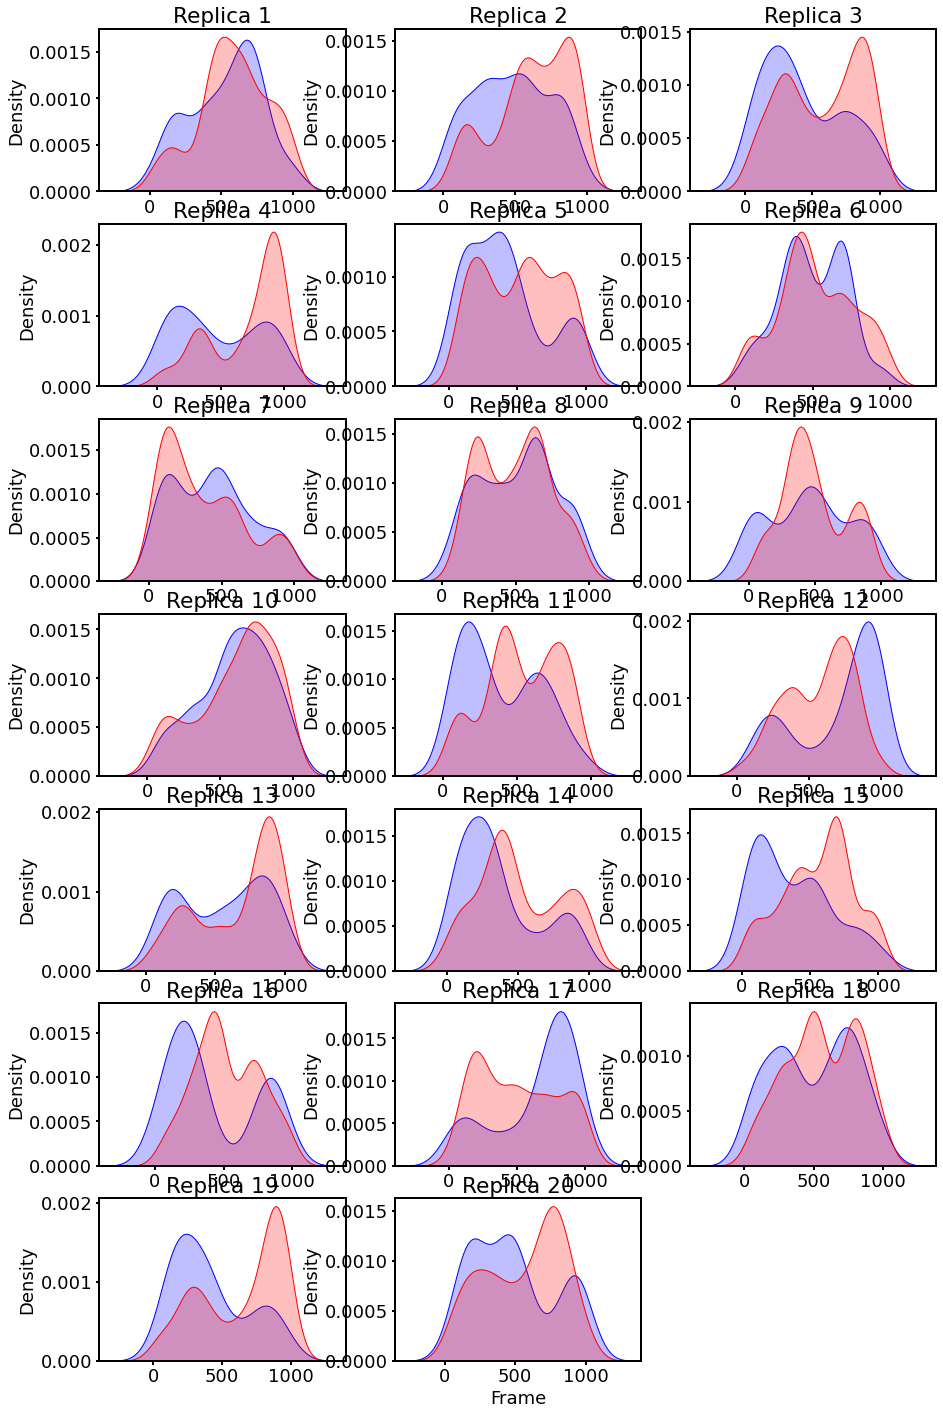

In [87]:
cutoff = 10.

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))

contact_count=[]
top_contact_count=0
bottom_contact_count=0
top_contact_table=np.zeros(5)
bottom_contact_table=np.zeros(5)



for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_contacts = []
    bottom_contacts = []
    
    arm_charges =[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())
    
    for i in range(traj.n_chains):
        arm_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))
        top_pair_list = np.array([(i, j) for i in arm_charges for j in top_charges])
        bottom_pair_list = np.array([(i, j) for i in arm_charges for j in bottom_charges])
        
        top_dists = 10.*md.compute_distances(traj, top_pair_list, periodic=False, opt=True)
        bottom_dists = 10.*md.compute_distances(traj, bottom_pair_list, periodic=False, opt=True)
        is_contact = top_dists < cutoff
        top_contacts.append(is_contact.any(axis=1))
        is_contact = bottom_dists < cutoff
        bottom_contacts.append(is_contact.any(axis=1))

    top_contacts = np.stack(top_contacts, axis=1).sum(axis=1)
    bottom_contacts = np.stack(bottom_contacts, axis=1).sum(axis=1)
    
    top_contacts_kde = []
    for i in range(0,len(top_contacts)):
        if top_contacts[i] == 1:
            top_contacts_kde.append(i)
        if top_contacts[i] == 2:
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
        if top_contacts[i] == 3:
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
            top_contacts_kde.append(i)
        if bottom_contacts[i] == 4:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)      
            bottom_contacts_kde.append(i)    

    bottom_contacts_kde = []
    for i in range(0,len(bottom_contacts)):
        if bottom_contacts[i] == 1:
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 2:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 3:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
        if bottom_contacts[i] == 4:
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)
            bottom_contacts_kde.append(i)      
            bottom_contacts_kde.append(i)
   
    sb.kdeplot(top_contacts_kde,gridsize=1000,shade=True,color="b")
    sb.kdeplot(bottom_contacts_kde,gridsize=1000,shade=True,color="r")
    plt.title("Replica {}".format(rep+1))
    
plt.xlabel('Frame')
plt.ylabel('Density')
plt.show()

In [88]:
col_names=["No Contact","Single Contact","Double Contact","Triple Contact","Quadruple Contact"]
thr_data = {
    '': col_names,
    'Predicted Top Contact': [18750],
    'Predicted Bottom Contact': [],
}
# pd.DataFrame(thr_data)

In [89]:
str([1,5,col_names])

"[1, 5, ['No Contact', 'Single Contact', 'Double Contact', 'Triple Contact', 'Quadruple Contact']]"

# Arm Sticking

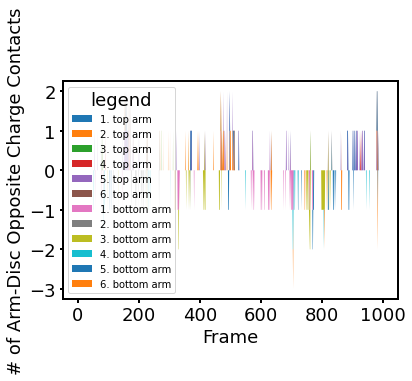

In [90]:
cutoff = 10

top_charges=[]
bottom_charges=[]

for i in range(traj.n_chains):
    top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
    bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())

arm_1_top_contacts = []
arm_2_top_contacts = []
arm_3_top_contacts = []
arm_4_top_contacts = []
arm_5_top_contacts = []
arm_6_top_contacts = []

arm_1_bottom_contacts = []
arm_2_bottom_contacts = []
arm_3_bottom_contacts = []
arm_4_bottom_contacts = []
arm_5_bottom_contacts = []
arm_6_bottom_contacts = []

arm_1_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(0, 0*102+66))
arm_2_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(1, 1*102+66))
arm_3_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(2, 2*102+66))
arm_4_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(3, 3*102+66))
arm_5_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(4, 4*102+66))
arm_6_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(5, 5*102+66))
    
top_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in top_charges])
top_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in top_charges])
top_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in top_charges])
top_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in top_charges])
top_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in top_charges])
top_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in top_charges])

bottom_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in bottom_charges])
bottom_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in bottom_charges])
bottom_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in bottom_charges])
bottom_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in bottom_charges])
bottom_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in bottom_charges])
bottom_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in bottom_charges])
    
top_1_dists = 10.*md.compute_distances(traj, top_pair_1_list, periodic=False, opt=True)
top_2_dists = 10.*md.compute_distances(traj, top_pair_2_list, periodic=False, opt=True)
top_3_dists = 10.*md.compute_distances(traj, top_pair_3_list, periodic=False, opt=True)
top_4_dists = 10.*md.compute_distances(traj, top_pair_4_list, periodic=False, opt=True)
top_5_dists = 10.*md.compute_distances(traj, top_pair_5_list, periodic=False, opt=True)
top_6_dists = 10.*md.compute_distances(traj, top_pair_6_list, periodic=False, opt=True)
    
bottom_1_dists = 10.*md.compute_distances(traj, bottom_pair_1_list, periodic=False, opt=True)
bottom_2_dists = 10.*md.compute_distances(traj, bottom_pair_2_list, periodic=False, opt=True)
bottom_3_dists = 10.*md.compute_distances(traj, bottom_pair_3_list, periodic=False, opt=True)
bottom_4_dists = 10.*md.compute_distances(traj, bottom_pair_4_list, periodic=False, opt=True)
bottom_5_dists = 10.*md.compute_distances(traj, bottom_pair_5_list, periodic=False, opt=True)
bottom_6_dists = 10.*md.compute_distances(traj, bottom_pair_6_list, periodic=False, opt=True)
    
is_contact = top_1_dists < cutoff
arm_1_top_contacts.append(is_contact.any(axis=1))
is_contact = top_2_dists < cutoff
arm_2_top_contacts.append(is_contact.any(axis=1))
is_contact = top_3_dists < cutoff
arm_3_top_contacts.append(is_contact.any(axis=1))
is_contact = top_4_dists < cutoff
arm_4_top_contacts.append(is_contact.any(axis=1))
is_contact = top_5_dists < cutoff
arm_5_top_contacts.append(is_contact.any(axis=1))
is_contact = top_6_dists < cutoff
arm_6_top_contacts.append(is_contact.any(axis=1))

is_contact = bottom_1_dists < cutoff
arm_1_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_2_dists < cutoff
arm_2_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_3_dists < cutoff
arm_3_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_4_dists < cutoff
arm_4_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_5_dists < cutoff
arm_5_bottom_contacts.append(is_contact.any(axis=1))
is_contact = bottom_6_dists < cutoff
arm_6_bottom_contacts.append(is_contact.any(axis=1))

plt.figure(facecolor='w')
stkplt_labels=[]
for k in ['top','bottom']:
    for m in range(6):
        stkplt_labels.append("{}. {} arm".format(m+1,k))
plt.stackplot(range(traj.n_frames), arm_1_top_contacts[0],arm_2_top_contacts[0],arm_3_top_contacts[0],arm_4_top_contacts[0],arm_5_top_contacts,arm_6_top_contacts[0],arm_1_bottom_contacts[0]*-1,arm_2_bottom_contacts[0]*-1,arm_3_bottom_contacts[0]*-1,arm_4_bottom_contacts[0]*-1,arm_5_bottom_contacts[0]*-1,arm_6_bottom_contacts[0]*-1,labels=stkplt_labels,baseline="zero")
plt.legend(title="legend",prop={'size':10},loc="center left")
    
plt.xlabel('Frame',loc="center")
plt.ylabel('# of Arm-Disc Opposite Charge Contacts')
plt.show()
    


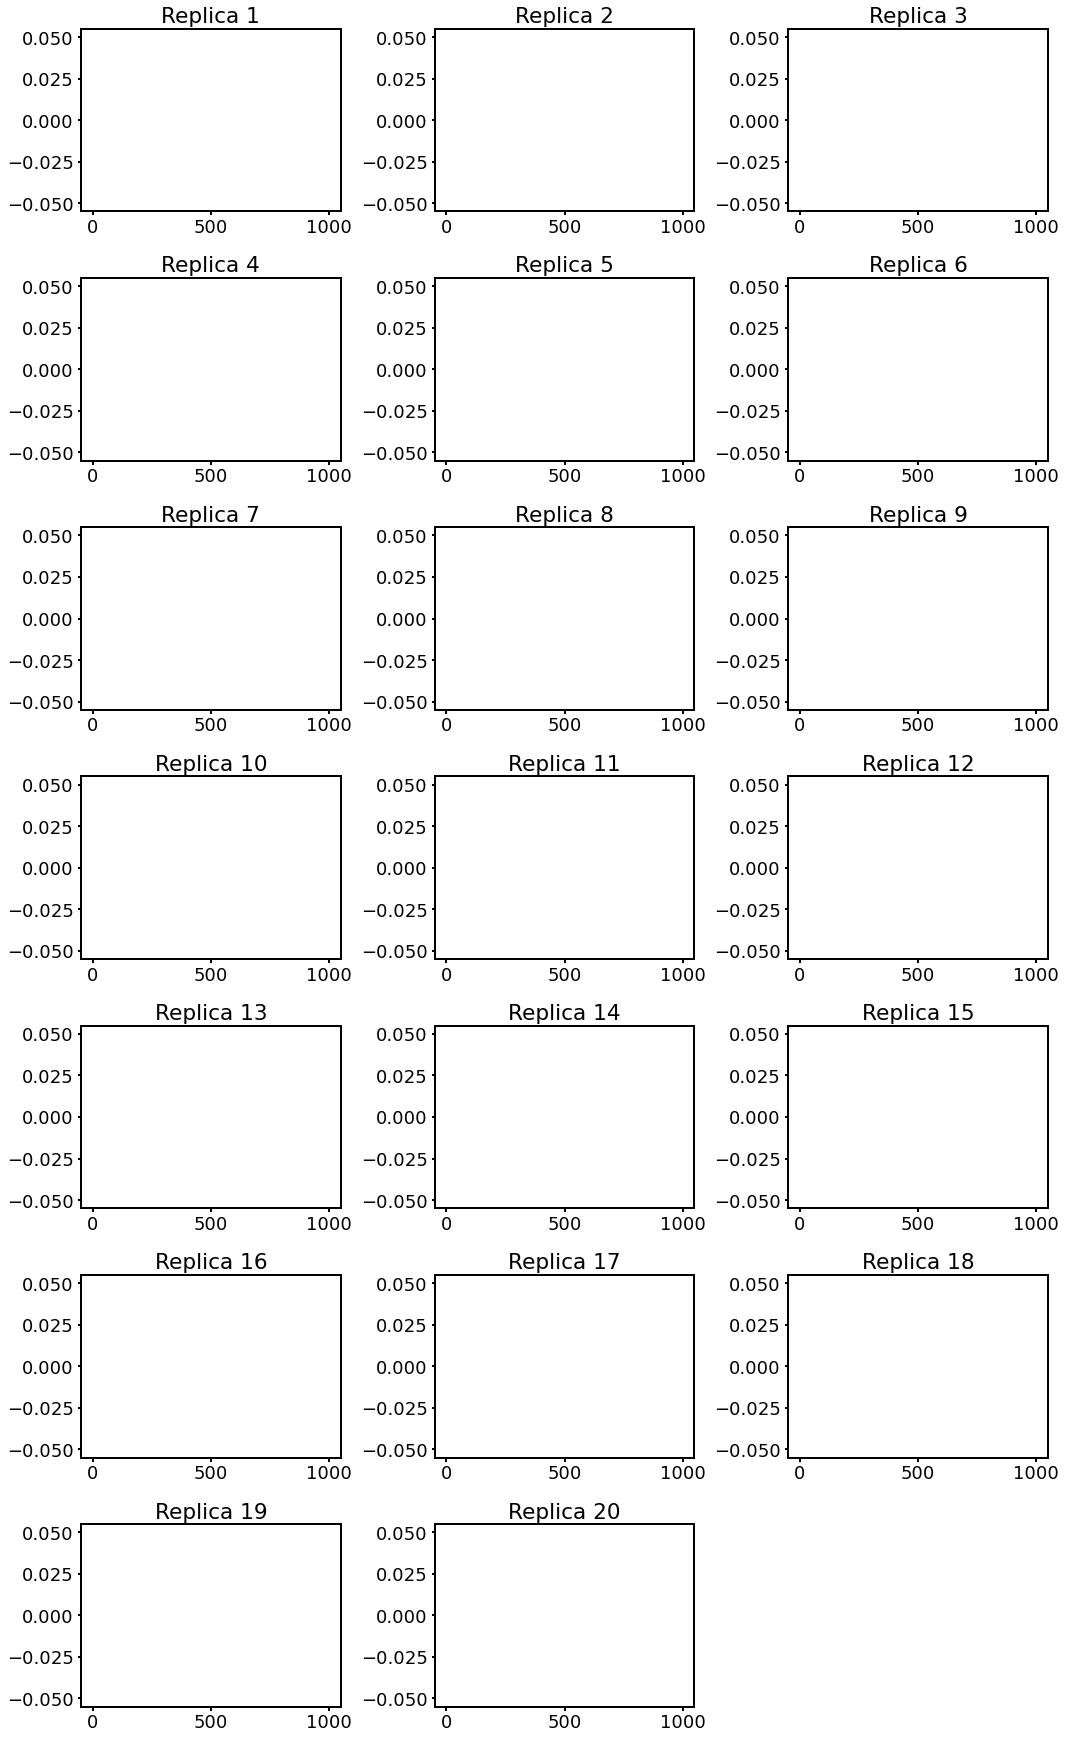

In [98]:
cutoff = 1

n = 3
m = -(-n_rep//n)
nrows = int(ceil(n_rep/n))
fig0 = plt.figure(figsize=(5*n,3.5*m))


stkplt_labels=[]
for k in ['top','bottom']:
    for m in range(5):
        stkplt_labels.append("{}. {} arm".format(m+1,k))

for rep in range(n_rep):
    plt.subplot(nrows, n, rep+1)
    
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    traj = mu.load_upside_traj(traj_fn, stride=1)
    
    top_charges=[]
    bottom_charges=[]
    
    for i in range(traj.n_chains):
        top_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i, i*102+2,i*102+15,i*102+16,i*102+55)).tolist())
        bottom_charges.extend(traj.top.select("chainid {} and ((resid {} or resid {}) or (resid {} or resid {})) and name CA".format(i,i*102+18,i*102+30,i*102+46,i*102+65)).tolist())

    arm_1_top_contacts = []
    arm_2_top_contacts = []
    arm_3_top_contacts = []
    arm_4_top_contacts = []
    arm_5_top_contacts = []
    arm_6_top_contacts = []

    arm_1_bottom_contacts = []
    arm_2_bottom_contacts = []
    arm_3_bottom_contacts = []
    arm_4_bottom_contacts = []
    arm_5_bottom_contacts = []
    arm_6_bottom_contacts = []

    arm_1_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(0, 0*102+66))
    arm_2_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(1, 1*102+66))
    arm_3_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(2, 2*102+66))
    arm_4_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(3, 3*102+66))
    arm_5_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(4, 4*102+66))
    arm_6_charges = traj.top.select("chainid {} and (resid > {}) and (resname ASP or resname GLU) and name CA".format(5, 5*102+66))

    top_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in top_charges])
    top_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in top_charges])
    top_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in top_charges])
    top_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in top_charges])
    top_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in top_charges])
    top_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in top_charges])

    bottom_pair_1_list = np.array([(i, j) for i in arm_1_charges for j in bottom_charges])
    bottom_pair_2_list = np.array([(i, j) for i in arm_2_charges for j in bottom_charges])
    bottom_pair_3_list = np.array([(i, j) for i in arm_3_charges for j in bottom_charges])
    bottom_pair_4_list = np.array([(i, j) for i in arm_4_charges for j in bottom_charges])
    bottom_pair_5_list = np.array([(i, j) for i in arm_5_charges for j in bottom_charges])
    bottom_pair_6_list = np.array([(i, j) for i in arm_6_charges for j in bottom_charges])

    top_1_dists = 10.*md.compute_distances(traj, top_pair_1_list, periodic=False, opt=True)
    top_2_dists = 10.*md.compute_distances(traj, top_pair_2_list, periodic=False, opt=True)
    top_3_dists = 10.*md.compute_distances(traj, top_pair_3_list, periodic=False, opt=True)
    top_4_dists = 10.*md.compute_distances(traj, top_pair_4_list, periodic=False, opt=True)
    top_5_dists = 10.*md.compute_distances(traj, top_pair_5_list, periodic=False, opt=True)
    top_6_dists = 10.*md.compute_distances(traj, top_pair_6_list, periodic=False, opt=True)

    bottom_1_dists = 10.*md.compute_distances(traj, bottom_pair_1_list, periodic=False, opt=True)
    bottom_2_dists = 10.*md.compute_distances(traj, bottom_pair_2_list, periodic=False, opt=True)
    bottom_3_dists = 10.*md.compute_distances(traj, bottom_pair_3_list, periodic=False, opt=True)
    bottom_4_dists = 10.*md.compute_distances(traj, bottom_pair_4_list, periodic=False, opt=True)
    bottom_5_dists = 10.*md.compute_distances(traj, bottom_pair_5_list, periodic=False, opt=True)
    bottom_6_dists = 10.*md.compute_distances(traj, bottom_pair_6_list, periodic=False, opt=True)

    is_contact = top_1_dists < cutoff
    arm_1_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_2_dists < cutoff
    arm_2_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_3_dists < cutoff
    arm_3_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_4_dists < cutoff
    arm_4_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_5_dists < cutoff
    arm_5_top_contacts.append(is_contact.any(axis=1))
    is_contact = top_6_dists < cutoff
    arm_6_top_contacts.append(is_contact.any(axis=1))

    is_contact = bottom_1_dists < cutoff
    arm_1_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_2_dists < cutoff
    arm_2_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_3_dists < cutoff
    arm_3_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_4_dists < cutoff
    arm_4_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_5_dists < cutoff
    arm_5_bottom_contacts.append(is_contact.any(axis=1))
    is_contact = bottom_6_dists < cutoff
    arm_6_bottom_contacts.append(is_contact.any(axis=1))
    
    plt.stackplot(range(traj.n_frames), arm_1_top_contacts[0],arm_2_top_contacts[0],arm_3_top_contacts[0],arm_4_top_contacts[0],arm_5_top_contacts,arm_6_top_contacts[0],arm_1_bottom_contacts[0]*-1,arm_2_bottom_contacts[0]*-1,arm_3_bottom_contacts[0]*-1,arm_4_bottom_contacts[0]*-1,arm_5_bottom_contacts[0]*-1,arm_6_bottom_contacts[0]*-1,labels=stkplt_labels,baseline="zero")
    plt.title("Replica {}".format(rep+1))

#plt.legend(title="legend",prop={'size':8},loc="center left")
#fig0.text(0., 0.5, '# of Arm-Disc Opposite Charge Contacts', fontsize=28, ha='center', va='center', rotation='vertical')
#fig0.text(0.5, 0., 'Frame', fontsize=28, ha='center', va='center')
plt.tight_layout()

In [92]:
bob=['x','y','z']
bob=('x','y','z')

[[bob[i],i,'temp'] for i in range(3)]

[['x', 0, 'temp'], ['y', 1, 'temp'], ['z', 2, 'temp']]

# Dipole

In [40]:
#use mdtraj package to find dipole at each frame then find average dipole across all frames

#creating array of charges
trajCharges=np.zeros(traj.n_atoms)
for i in acid_sele:
    trajCharges[i]=-1
for i in base_sele:
    trajCharges[i]=1
#(1000,3) array with dipole moment at each frame
trajDipoleMoments=md.dipole_moments(traj,trajCharges)
#calculating stats
print("mean dipole: {}".format(np.mean(trajDipoleMoments,axis=0)))
print("std dipole: {}".format(np.std(trajDipoleMoments,axis=0)))
trajDipoleMomentMagnitude = []
for i in range (200,999):
    trajDipoleMomentMagnitude.append(np.linalg.norm(trajDipoleMoments[i],ord=2))
print("mean magnitude of dipole: {}".format(np.mean(trajDipoleMomentMagnitude)))
print("std of magnitude of dipole: {}".format(np.std(trajDipoleMomentMagnitude)))

holding_val=np.mean(trajDipoleMoments,axis=0)

mean dipole: [ 9.72303125  3.46391692 19.31174303]
std dipole: [22.02472489 20.81988394 24.31482033]
mean magnitude of dipole: 43.48674376321543
std of magnitude of dipole: 18.89699670341351


In [41]:
trajCharges=np.zeros(traj.n_atoms)

#acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")
not_arm_acid_charges = traj.top.select("chainid {} and (resid < {}) and (resname ASP or resname GLU) and name CA".format(i, i*102+66))



#for i in range(6):
#    acid_sele.remove(96+i*102)
#    acid_sele.remove(99+i*102)
#    acid_sele.remove(101+i*102)

#acid_sele=np.toarray(acid_sele)
    
for i in not_arm_acid_charges:
    trajCharges[i]=-1
for i in base_sele:
    trajCharges[i]=1
#(1000,3) array with dipole moment at each frame
trajDipoleMoments=md.dipole_moments(traj,trajCharges)
#calculating stats
print("mean dipole: {}".format(np.mean(trajDipoleMoments,axis=0)))
print("std dipole: {}".format(np.std(trajDipoleMoments,axis=0)))
trajDipoleMomentMagnitude = []
for i in range (200,999):
    trajDipoleMomentMagnitude.append(np.linalg.norm(trajDipoleMoments[i],ord=2))
print("mean magnitude of dipole: {}".format(np.mean(trajDipoleMomentMagnitude)))
print("std of magnitude of dipole: {}".format(np.std(trajDipoleMomentMagnitude)))
temp_val_2=np.mean(trajDipoleMoments,axis=0)

mean dipole: [ 17.84048519  84.76318768 -83.86131118]
std dipole: [38.05597228 45.11863971 31.1987154 ]
mean magnitude of dipole: 135.66970615211545
std of magnitude of dipole: 38.677474879345674


In [34]:
print(u_cross_v)

[4.1001811027526855, 5.06557559967041, 3.2047424912452698]


In [45]:
print("along z w/ arm charges " + str(np.dot(u_cross_v,holding_val)))
print("along z w/o arm charges " +  str(np.dot(u_cross_v,temp_val_2)))

along z w/ arm charges 119.30208547063515
along z w/o arm charges 233.76964820865624


In [24]:
acid_sele = traj.top.select("(resname ASP or resname GLU) and name CA")
base_sele = traj.top.select("(resname LYS or resname ARG) and name CA")
print(acid_sele)
print(base_sele)

[  48  102  216  234  576  588  594  606  659  713  827  845 1187 1199
 1205 1217 1270 1324 1438 1456 1798 1810 1816 1828 1881 1935 2049 2067
 2409 2421 2427 2439 2492 2546 2660 2678 3020 3032 3038 3050 3103 3157
 3271 3289 3631 3643 3649 3661]
[  12   90   96  108  180  276  330  390  623  701  707  719  791  887
  941 1001 1234 1312 1318 1330 1402 1498 1552 1612 1845 1923 1929 1941
 2013 2109 2163 2223 2456 2534 2540 2552 2624 2720 2774 2834 3067 3145
 3151 3163 3235 3331 3385 3445]


# Rg

## Accross single replica trajectory

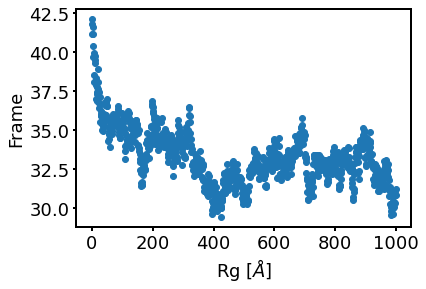

In [94]:
rep = 0

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

rg = 10.*md.compute_rg(traj)
x = np.arange(traj.n_frames)

plt.scatter(x, rg)
plt.xlabel("Rg [$\AA$]")
plt.ylabel("Frame") #change````````````````````````````````````````````````````````````````````````````````````````````
plt.show()

## Melting curves

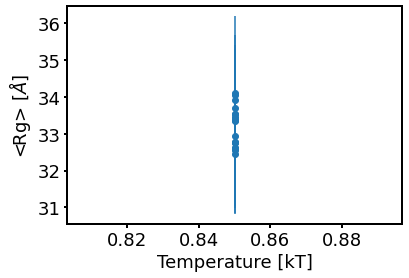

In [99]:
equil_frac = 1/4 # fraction of frames to discard for equilibration

temps = np.zeros(n_rep)
rg_mu = np.zeros(n_rep)
rg_std = np.zeros(n_rep)

for rep in range(n_rep):
    traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
    
    with tb.open_file(traj_fn) as t:
        temps[rep] = t.root.output.temperature[0]
        
    traj = mu.load_upside_traj(traj_fn, stride=1)
    rg = 10.*md.compute_rg(traj)[int(traj.n_frames*equil_frac):]
    rg_mu[rep] = rg.mean()
    rg_std[rep] = rg.std()
    
plt.errorbar(temps, rg_mu, yerr=rg_std, fmt='o--')
plt.xlabel("Temperature [kT]")
plt.ylabel("<Rg> [$\AA$]")
plt.show()

# RMSD

## Accross single replica trajectory

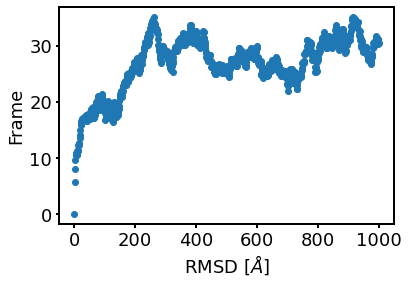

In [96]:
rep = 0

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

# Choose a reference structure. Either load from a file...
ref_fn = base_dir + "{}.pdb".format(pdb_id)
ref = md.load(ref_fn)
# Or pick a frame in the trajectory of interest. Uncomment the following line for that
# native = traj[0]

sele_CA_ref = ref.top.select("name CA") # Select CA for reference
sele_CA_traj = traj.top.select("name CA") # Select CA for traj

rmsd = 10.*md.rmsd(traj.atom_slice(sele_CA_traj), ref.atom_slice(sele_CA_ref))
x = np.arange(traj.n_frames)

plt.scatter(x, rmsd)
plt.xlabel("RMSD [$\AA$]")
plt.ylabel("Frame")
plt.show()

## Distribution

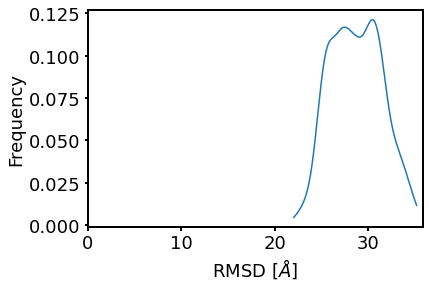

In [97]:
from scipy.stats import gaussian_kde

rep = 0
equil_frac = 1/4 # fraction of frames to discard for equilibration

traj_fn = output_dir + "{}.{}.up".format(pdb_id, rep)
traj = mu.load_upside_traj(traj_fn, stride=1)

# Choose a reference structure. Either load from a file...
ref_fn = base_dir + "{}.pdb".format(pdb_id)
ref = md.load(ref_fn)
# Or pick a frame in the trajectory of interest. Uncomment the following line for that
# native = traj[0]

sele_CA_ref = ref.top.select("name CA") # Select CA for reference
sele_CA_traj = traj.top.select("name CA") # Select CA for traj

rmsd = 10.*md.rmsd(traj.atom_slice(sele_CA_traj), ref.atom_slice(sele_CA_ref))[int(traj.n_frames*equil_frac):]
dat_min = rmsd.min()
dat_max = rmsd.max()
x = np.linspace(dat_min, dat_max, num=int((dat_max-dat_min)/8.*(128+1)))
kernel = gaussian_kde(rmsd)
y = kernel(x)

plt.plot(x, y)
plt.xlim(left=0)
plt.xlabel("RMSD [$\AA$]")
plt.ylabel("Frequency")
plt.show()